# Website Phishing

## Group Members:
#### Dino Anastasopoulos: 1900661

#### Timothy Walters: 1855167

#### Razeen Gani: 1842173

#### Reece James Peters: 1924514

## Library imports

In [32]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

## Attributes

## Create empty design matrix

In [55]:
designMatrix = pd.DataFrame(columns = [
    'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',
    'Class',
] ) 

## Import data and populate designMatrix

In [78]:
lineNum = 0

for line in open("Files/data.txt", "r"):
    lineSplit = line.strip().split(",")
    designMatrix.loc[lineNum] = lineSplit   
    lineNum+=1
    
designMatrix

,SFH,PopUpWindow,SSL_Final_State,Request_URL,URL_of_Anchor,Web_Traffic,URL_Length,Age_Of_Domain,IP_Address,Class
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1348,-1,-1,-1,-1,-1,-1,0,1,0,1
1349,-1,0,1,0,-1,0,0,1,0,-1
1350,-1,0,-1,-1,-1,0,-1,-1,0,1
1351,0,0,1,0,0,0,-1,1,0,1


## Split into training, validation and testing data

In [79]:
trainData, testData = train_test_split(designMatrix, test_size = 0.4)

testData, valData = train_test_split(testData, test_size = 0.5)

In [80]:
print("trainData size: " + str(len(trainData)))
print("valData size: " + str(len(valData)))
print("testData size: " + str(len(testData)))

trainData size: 811
valData size: 271
testData size: 271


## Splitting the train,val and test data by their attributes and classes

In [81]:
train_x = trainData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]
print(train_x)


train_y =trainData['Class']
OG_train_y=train_y
#print(train_y)

test_x =  testData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]

test_y =testData['Class']

val_x =  valData[[ 'SFH',
    'PopUpWindow',
    'SSL_Final_State',
    'Request_URL',
    'URL_of_Anchor',
    'Web_Traffic',
    'URL_Length',
    'Age_Of_Domain',
    'IP_Address',]]

val_y =valData['Class']

     SFH PopUpWindow SSL_Final_State Request_URL URL_of_Anchor Web_Traffic  \
809    1           0               1           0            -1          -1   
1239   1           1               1          -1             1          -1   
502    1           0               1           0             0           1   
744    1          -1               1           1             1           0   
417    1          -1               1          -1             1          -1   
...   ..         ...             ...         ...           ...         ...   
337    1           0               1          -1             1          -1   
896    1           0               1           1             1           0   
825    1          -1               1          -1            -1           0   
1176  -1          -1              -1           0            -1           1   
769   -1           1               0           0            -1          -1   

     URL_Length Age_Of_Domain IP_Address  
809           0     

## Defining our logistic regression function, learning rate, tolerance and creating default "true" thetas

In [285]:
def h(x, θ): # Regression function
    return 1/(1+np.exp(-np.dot(x, θ))) # logistic regression using the dot product

l_rate = 0.001 #0.00001
tol = 0.001

## Model 1: Create A Conversion Matrix 
#### We keep all y-values equal to 1 as 1 and we convert all y-values equal to 0 or -1 to 0

In [286]:
holder = train_y 

Con1 = np.copy(holder)
Con1 = Con1.reshape(holder.shape[0])

#print(Con1.shape)
#print(Con1) 
#print(Con1[87])

#Check if there are instances of -1 in dataset
if "-1" in Con1:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')

#Change all 0's and -1's to 0's, and all 1's remain unchanged
for x in range(Con1.shape[0]):    
    if Con1[x] == "-1" or Con1[x] == "0":
        Con1[x] = "0"

#Check that theres no instances of -1 in dataset
if "-1" in Con1:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
    
#print(Con1) 
#print(Con1[87])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


## Logistic Regression For Model 1

In [287]:
thetas1= np.ones(train_x.shape[1]) # initialize our parameters for training data
thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"


print(thetas1)
print(thetas_old)
print(thetas1.shape)
print(thetas_old.shape)

model1_y = np.array(Con1,dtype = np.float64)

model1_y = model1_y.reshape(811,1)

print(model1_y[0])
print(model1_y.shape)

X = np.array(train_x, dtype = np.float64)  

print(X[0])
print(X.shape)

error1 = []
timeline1 = []
iterations1 = 0

while np.linalg.norm(abs(thetas1 - thetas_old)) > tol and iterations1 != 1200:

    
    for i in range(X.shape[0]): 
        thetas1 = thetas1 - l_rate*( (h(X[i], thetas1) - model1_y[i]) * X[i])
        #print(thetas1-thetas_old)
        

     
    if iterations1%50 == 0:                              
        j = 0.5 * pow(model1_y[i] - h(X[i], thetas1), 2) 
        error1.append(j)
        timeline1.append(iterations1)   
        #print("Error:" + str(error))
        #print("Timeline: " + str(timeline))
        #print()       

    iterations1 = iterations1+1   
        
print(iterations1)        
print("Model Parameters: ", thetas1)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[0.]
(811, 1)
[ 1.  0.  1.  0. -1. -1.  0.  1.  0.]
(811, 9)
1200
Model Parameters:  [-1.48761743 -1.41026048 -1.51697377 -0.03796275 -0.18757256  0.18116406
 -0.34305238 -0.25601865  0.66282202]


### Plot Model 1 error

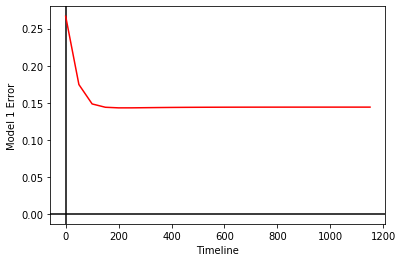

In [288]:
size = len(error1)

x1_time = np.zeros(size)
y1_error= np.zeros(size) 

for i in range(0, size):
    x1_time[i] = timeline1[i]
    y1_error[i] = error1[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 1 Error')
plt.plot(x1_time, y1_error, color="red")

## Model 2: Create A Conversion Matrix

##### We keep all y-values equal to 0 as 1 and we convert all y-values equal to 1 or -1 to 0

In [289]:
holder = train_y

Con2 = np.copy(holder)
Con2 = Con2.reshape(holder.shape[0])

#print(Con2.shape)
#print(Con2)
#print(Con2[19])
#print(Con2[33])

#Check if there are instances of -1 in dataset
if "-1" in Con2:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')
    
#Change all 0's to 1's, and change all 1's and -1's to 0's
for x in range(Con2.shape[0]):    
    if Con2[x] == "0":
        Con2[x] = 1
    elif Con2[x] == "1" or Con2[x] == "-1":
        Con2[x] = 0         

#Check that theres no instances of -1 in dataset
if "-1" in Con2:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
                
#print(Con2)
#print(Con2[19])
#print(Con2[33])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


## Logistic Regression For Model 2

In [290]:
thetas2= np.ones(train_x.shape[1]) # initialize our parameters

thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"

print(thetas2)
print(thetas_old)
print(thetas2.shape)
print(thetas_old.shape)

model2_y = np.array(Con2,dtype = np.float64)

model2_y = model2_y.reshape(811,1)

print(model2_y[0])
print(model2_y.shape)

X2 = np.array(train_x, dtype = np.float64)  

print(X2[0])
print(X2.shape)

error2 = []
timeline2 = []
iterations2 = 0

while np.linalg.norm(abs(thetas2 - thetas_old)) > tol and iterations2 != 1200:
    thetas_old = thetas2
    for i in range(X2.shape[0]): 
        thetas2 = thetas2 - l_rate*( (h(X2[i], thetas2) - model2_y[i]) * X2[i] )
        
    if iterations2%50 == 0:                              
        j = 0.5 * pow(model2_y[i] - h(X2[i], thetas2), 2) 
        error2.append(j)
        timeline2.append(iterations2)   
        #print("Error:" + str(error2))
        #print("Timeline: " + str(timeline2))
        #print()       

    iterations2 = iterations2+1   
        
print(iterations2)        
print("Model Parameters: ", thetas2)

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[0.]
(811, 1)
[ 1.  0.  1.  0. -1. -1.  0.  1.  0.]
(811, 9)
424
Model Parameters:  [-0.86412113  1.14079975 -0.35352968  0.26669209 -0.06873944 -0.53187178
  0.72358946 -0.41039341 -2.50587854]


### Plot Model 2 error

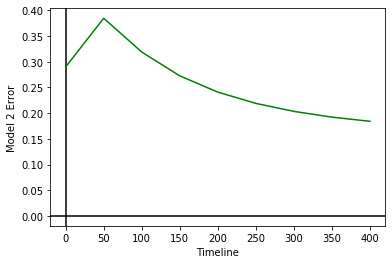

In [291]:
size = len(error2)

x2_time = np.zeros(size)
y2_error= np.zeros(size) 

for i in range(0, size):
    x2_time[i] = timeline2[i]
    y2_error[i] = error2[i]

plt.axhline(0,color='black') 
plt.axvline(0,color='black') 
plt.xlabel('Timeline')
plt.ylabel('Model 2 Error')
plt.plot(x2_time, y2_error, color="green")

## Model 3: Create A Conversion Matrix

##### We keep all y-values equal to -1 as 1 and we convert all y-values equal to 1 or 0 to 0

In [292]:
holder = train_y 

Con3 = np.copy(holder)
Con3 = Con3.reshape(holder.shape[0])

#print(Con3.shape)
#print(Con3)
#print(Con3[1])
#print(Con3[2])

#Check if there are instances of -1 in dataset
if "-1" in Con3:
    print('Before: Element -1 exists in Dataframe')
else:
    print('Before: No instances of -1 in dataset')
    print(Con3)
    
#Change all -1's to 1's, and change all 1's and 0's to 0
for x in range(Con3.shape[0]):    
    if Con3[x] == "-1":
        Con3[x] = 1
    elif Con3[x] == "1" or Con3[x] == "0":
        Con3[x] = 0

#Check that theres no instances of -1 in dataset
if "-1" in Con3:
    print('After: Element -1 exists in Dataframe')
else:
    print('After: No instances of -1 in dataset')
        
#print(Con3)
#print(Con3[1])
#print(Con3[2])

Before: Element -1 exists in Dataframe
After: No instances of -1 in dataset


In [293]:
thetas3= np.ones(train_x.shape[1]) # initialize our parameters

thetas_old = np.zeros(train_x.shape[1]) #initialises "old parameters which will go in our regression function"

print(thetas3)
print(thetas_old)
print(thetas3.shape)
print(thetas_old.shape)

model3_y = np.array(Con3,dtype = np.float64)

model3_y = model3_y.reshape(811,1)

print(model3_y[0])
print(model3_y.shape)

X3 = np.array(train_x, dtype = np.float64)  

print(X3[0])
print(X3.shape)

error3 = []
timeline3 = []
iterations3 = 0

while np.linalg.norm(abs(thetas3 - thetas_old)) > tol and iterations3 != 1200:
    thetas_old = thetas3
    for i in range(X3.shape[0]): 
        thetas3 = thetas3 - l_rate*( (h(X3[i], thetas3) - model3_y[i]) * X3[i] )
  
    if iterations3%20 == 0:                              
        j = 0.5 * pow(model3_y[i] - h(X3[i], thetas3), 2) 
        error3.append(j)
        timeline3.append(iterations3)   
        #print("Error:" + str(error3))
        #print("Timeline: " + str(timeline3))
        #print()       

    iterations3 = iterations3 + 1   
        
print(iterations3)        
print("Model Parameters: ", thetas3) 

[1. 1. 1. 1. 1. 1. 1. 1. 1.]
[0. 0. 0. 0. 0. 0. 0. 0. 0.]
(9,)
(9,)
[1.]
(811, 1)
[ 1.  0.  1.  0. -1. -1.  0.  1.  0.]
(811, 9)
393
Model Parameters:  [ 1.68084986  1.90837346  1.34524107  0.99622161  0.29991854 -0.07509314
 -0.2126432   0.18065853 -0.95132709]


### Plot Model 3 error

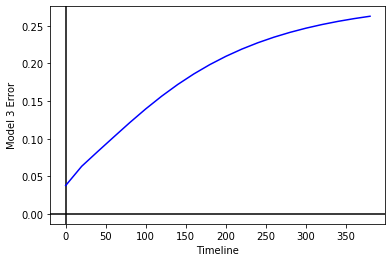

In [294]:
size = len(error3)

x3_time = np.zeros(size)
y3_error= np.zeros(size) 

for i in range(0, size):
    x3_time[i] = timeline3[i]
    y3_error[i] = error3[i]

plt.axhline(0,color='black') # plot horizontal axis at 0
plt.axvline(0,color='black') # plot vertical axis at 0
plt.xlabel('Timeline')
plt.ylabel('Model 3 Error')
plt.plot(x3_time, y3_error, color="blue")

# Predicted parameters for each model

In [295]:
print(iterations1)
print('Predicted Paramters For Model 1 ', thetas1)
print(iterations2)
print('Predicted Paramters For Model 2 ', thetas2)
print(iterations3)
print('Predicted Paramters For Model 3 ', thetas3)

1200
Predicted Paramters For Model 1  [-1.48761743 -1.41026048 -1.51697377 -0.03796275 -0.18757256  0.18116406
 -0.34305238 -0.25601865  0.66282202]
424
Predicted Paramters For Model 2  [-0.86412113  1.14079975 -0.35352968  0.26669209 -0.06873944 -0.53187178
  0.72358946 -0.41039341 -2.50587854]
393
Predicted Paramters For Model 3  [ 1.68084986  1.90837346  1.34524107  0.99622161  0.29991854 -0.07509314
 -0.2126432   0.18065853 -0.95132709]


## Defines Softmax function and classifies each data instance based on the highest probability

In [296]:
def f(X): # softmax function

    return np.exp(X) / np.sum(np.exp(X))

In [297]:
y_mat = []
classification = []
probs=([])
X_test = np.array(test_x, dtype = np.float64) #Used to test the classification on test data
X_val = np.array(val_x, dtype = np.float64)

for o in range(len(X_val)): #len(val_x)):#len(test_x))::
    y_mat.append(np.dot(thetas1,X_test[o]))  #Could have used X2 or X3, they're the same as X. Use X to check training 
    y_mat.append(np.dot(thetas2,X_test[o]))  #classification instead of X_test and X_val
    y_mat.append(np.dot(thetas3,X_test[o]))
    
    probs = f(y_mat)
    print(probs)
    maxPos = np.argmax(probs)
    print(maxPos)
    
    if maxPos == 0:
        classification.append(1)
    elif maxPos == 1:
        classification.append(0)
    elif maxPos == 2:    
        classification.append(-1)
    
    y_mat = []

print(classification)    

[9.40750075e-01 5.90029861e-02 2.46938869e-04]
0
[0.00482933 0.08681955 0.90835112]
2
[0.93851004 0.05135952 0.01013044]
0
[8.04658694e-04 8.56313236e-03 9.90632209e-01]
2
[0.92616451 0.04653309 0.0273024 ]
0
[0.55519979 0.34151041 0.10328981]
0
[0.89606069 0.09275924 0.01118008]
0
[0.01172943 0.00147188 0.98679869]
2
[4.32424886e-05 9.95265182e-04 9.98961492e-01]
2
[7.45564846e-05 8.28661665e-03 9.91638827e-01]
2
[0.78650926 0.12078818 0.09270256]
0
[0.75088495 0.21506542 0.03404963]
0
[9.94847001e-01 5.11982160e-03 3.31776983e-05]
0
[0.88841931 0.09918991 0.01239078]
0
[0.00104272 0.00543901 0.99351828]
2
[0.42820298 0.36826293 0.20353408]
0
[9.84421179e-01 1.54151107e-02 1.63710240e-04]
0
[4.05129518e-04 6.96935601e-04 9.98897935e-01]
2
[3.40908291e-04 4.26624573e-03 9.95392846e-01]
2
[0.00439011 0.08719177 0.90841812]
2
[0.33472591 0.04099447 0.62427962]
2
[0.80143169 0.16127769 0.03729061]
0
[0.00138589 0.01770918 0.98090494]
2
[0.00898798 0.00952204 0.98148997]
2
[0.00690049 0.02

In [298]:
#We Print Out The Data We Are Working With
#print(train_y)
print(test_y)
#print(val_y)

1197     1
565     -1
406     -1
1267    -1
1003     1
        ..
114     -1
509     -1
1352    -1
834     -1
224      1
Name: Class, Length: 271, dtype: object


In [299]:
#Variables used in confusion matrix
#Our Analysis of our data is done here 


true_count0 = 0
true_count1 = 0
true_count_neg1 = 0

pred1_when0 = 0
pred1_when_neg1 = 0

pred0_when1 = 0
pred0_when_neg1= 0

pred_neg1_when0 = 0
pred_neg1_when1 = 0

#We Comment Out the data that we aren't using
#test_yy = np.array(train_y,dtype = np.float64)
test_yy = np.array(test_y,dtype = np.float64)
#val_yy = np.array(val_y, dtype = np.float64) 



for d in range (len(test_yy)):#len(test_yy)):#len(test_yy)):
    if classification[d] == 0 and test_yy[d]==0: #test_yy[d] == 0: #test_yy[d] == 0:   
        true_count0 = true_count0+1
    if classification[d] == 1 and  test_yy[d] == 1: #test_yy[d]==1: #test_yy[d]==1: 
        true_count1 = true_count1+1
    if classification[d] == -1 and test_yy[d] == -1:#test_yy[d]==-1: #test_yy[d]==-1:    
        true_count_neg1 = true_count_neg1+1   
        
    if classification[d] == 1 and  test_yy[d] == 0:#test_yy[d]==0: #test_yy[d]==0:    
        pred1_when0 = pred1_when0+1
    if classification[d] == 1 and  test_yy[d] == -1: #test_yy[d]==-1: #test_yy[d]==-1:  
        pred1_when_neg1 = pred1_when_neg1+1 
        
    if classification[d] == 0 and  test_yy[d] == 1: #test_yy[d]==1: #test_yy[d]==1:  
        pred0_when1 = pred0_when1+1
    if classification[d] == 0 and  test_yy[d] == -1: #test_yy[d]==-1:#test_yy[d]==-1:  #    
        pred0_when_neg1= pred0_when_neg1+1
        
    if classification[d] == -1 and  test_yy[d] == 0: #test_yy[d]==0: #test_yy[d]==0: 
        pred_neg1_when0 = pred_neg1_when0+1
    if classification[d] == -1 and   test_yy[d] == 1: #test_yy[d]==1: #test_yy[d]==1:  
         pred_neg1_when1 = pred_neg1_when1+1   



## Printing Of Analysis, Correct Predictions, Accuracy,Error, Number of Predictions Of Each Class 

In [300]:
print("True predictions for 0,1,-1")            
print(true_count0)
print(true_count1)
print(true_count_neg1)
correct_predictions = true_count0+true_count1+true_count_neg1
print("Total Correct Predictions Added Up ", correct_predictions)
print()

print("False prediction 1 when value was 0 or -1")   
print(pred1_when0)
print(pred1_when_neg1)

print("False prediction 0 when value was 1 or -1") 
print(pred0_when1)
print(pred0_when_neg1)
print()

print("False prediction -1 when value was 0 or 1") 
print(pred_neg1_when0)
print(pred_neg1_when1)
print()
 
#Comment Out Data you're not using
#print("Number of prediction data points:",len(train_y))
print("Number of prediction data points:",len(test_y))
#print("Number of prediction data points:", len(val_y))

#accuracy = correct_predictions/len(train_y)
accuracy = correct_predictions/len(test_y)
#accuracy = correct_predictions/len(val_y)

print("Overall accuracy: ", accuracy*100)
print("Total Misclassification Rate/Error: ", (1-accuracy)*100)

#print("Error for logistic model 1: ", error1[-1])
#print("Error for logistic model 2: ",error2[-1])
#print("Error for logistic model 3: ", error3[-1])

True predictions for 0,1,-1
0
92
126
Total Correct Predictions Added Up  218

False prediction 1 when value was 0 or -1
9
17
False prediction 0 when value was 1 or -1
2
7

False prediction -1 when value was 0 or 1
10
8

Number of prediction data points: 271
Overall accuracy:  80.44280442804428
Total Misclassification Rate/Error:  19.55719557195572


## Confusion Matrix

In [284]:
print("\t \t Predicted")
print("\t \t", "0 ","\t"," 1","\t", "-1")
print("actual 0 \t",true_count0,"\t", pred1_when0,"\t",pred_neg1_when0)
print("actual 1 \t",pred0_when1,"\t", true_count1,"\t",pred_neg1_when1)
print("actual -1 \t",pred0_when_neg1,"\t", pred1_when_neg1,"\t",true_count_neg1)

	 	 Predicted
	 	 0  	  1 	 -1
actual 0 	 0 	 9 	 10
actual 1 	 2 	 92 	 8
actual -1 	 7 	 17 	 126
